# Выжившие Титаника


# **Данные**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
url = '/kaggle/input/test-file/tested.csv'

import pandas as pd
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

# **Обработка данных**

## Null значения

In [6]:
# checking nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Заполнение тарифа**

 Заполнение нулевых значений средним тарифом для их класса P:

In [7]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
fare_mean_c3 = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value=fare_mean_c3, inplace=True)

-----------------------------
**Заполнение возраста**

Чтобы заполнить возраст, мы можем проверить титулы (мисс, мистер, миссис, Мастер, доктор) и взять среднее значение возраста каждого из них, затем заполнить возраст в соответствии с титулом.

Mean age of Miss. title 22.0
Mean age of Mrs. title 39.0
Mean age of Mr. title 34.0
Mean age of Master. title 7.0


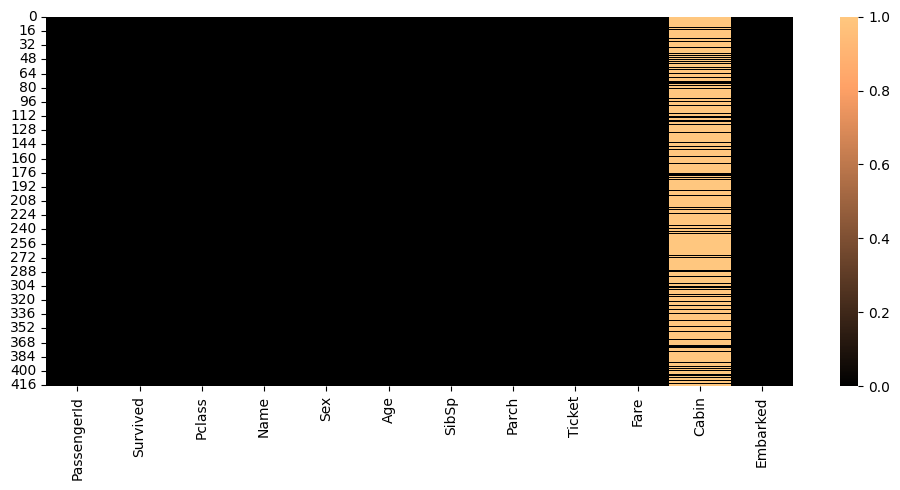

In [9]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

df['Age'] = df[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
sns.heatmap(df.isnull(),cmap='copper', ax=ax1)
plt.tight_layout()

## Кодирование

In [12]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

In [13]:
df_cat = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [14]:
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

prepared_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1) 

prepared_df.drop(['Embarked'], axis=1, inplace=True)

In [15]:
prepared_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1


In [16]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Q         418 non-null    uint8  
 8   S         418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


In [36]:
from sklearn.preprocessing import StandardScaler

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Масштабирование столбца 'Fare'
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

# Вывод первых нескольких строк для проверки
print(df.head())

#Один из распространенных методов - это стандартизация, при которой значения масштабируются так, чтобы их среднее значение было 0, а стандартное отклонение - 1. Для этого можно использовать класс StandardScaler из библиотеки scikit-learn.


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Fare_scaled
0         0       3    0  34.5      0      0   7.8292        Q    -0.497311
1         1       3    1  47.0      1      0   7.0000        S    -0.512175
2         0       2    0  62.0      0      0   9.6875        Q    -0.463999
3         0       3    0  27.0      0      0   8.6625        S    -0.482373
4         1       3    1  22.0      1      1  12.2875        S    -0.417392


## Корреляция

<AxesSubplot: >

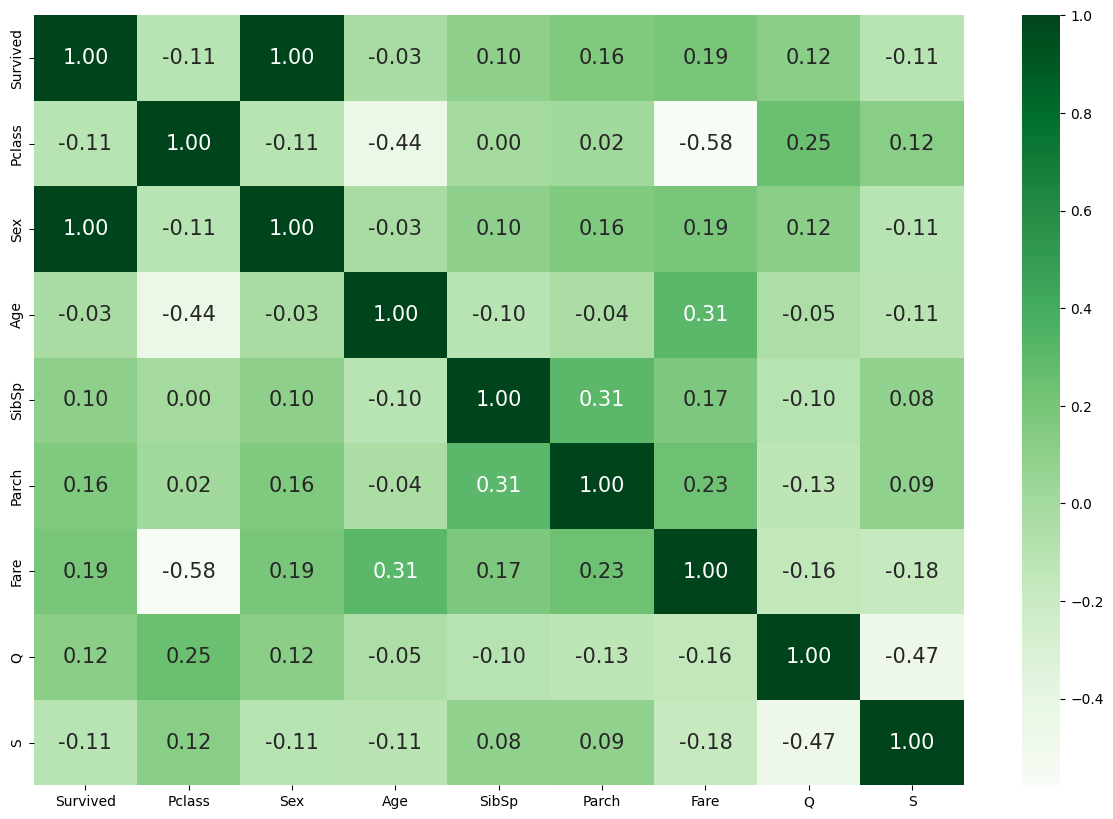

In [17]:
corr = prepared_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

## GaussianNB